In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#CLEAN THE AIRBNB DATA
AirBnB_df = pd.read_csv('Resources/AB_US_2020.csv')

#Add date column that states month-year to match city sales df headers
last_review = AirBnB_df.loc[:,'last_review']
AirBnB_df['last_review'] = AirBnB_df['last_review'].fillna('00/00/00')

new_dates_list = []
for date in last_review:
    if int(date[:2]) > 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[1]}'
        new_dates_list.append(new_date)
        
    elif int(date[:2]) <= 12:
        split_date = date.split('/')
        new_date = f'20{split_date[2]}-{split_date[0]}'
        new_dates_list.append(new_date)

AirBnB_df['Month/Year'] = new_dates_list


#Change New York City to New York
AirBnB_df = AirBnB_df.replace("New York City","New York")

#Change NaN for review_per_month to 0
AirBnB_df['reviews_per_month'] = AirBnB_df['reviews_per_month'].fillna(0)


# SALES CITY DATA
#Pull in Sales City data
sales_city_df = pd.read_csv('Resources/House_Sales_City.csv')

#Group Sales City Data and check duplicate cities (will have counts > 1)
grouped_df = sales_city_df.groupby('RegionName').count()

#Pull rows where values = 1 to get non-duplicate cities
sales_city_list = grouped_df[grouped_df['RegionID']==1].index

#Unique cities in the AirBnB data
thelist = AirBnB_df['city'].unique()

#Pull sales city data from cities in AirBnB data
clean_city_df = sales_city_df[sales_city_df['RegionName'].isin(sales_city_list)]
clean_city_df = clean_city_df[clean_city_df['RegionName'].isin(thelist)]

#Merge both data sets
merged_data = AirBnB_df.merge(clean_city_df, right_on = 'RegionName', left_on = 'city')

C:\Users\whois\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
cols_i_want = ["2008-03","2008-04",
"2008-05",
"2008-06",
"2008-07",
"2008-08",
"2008-09",
"2008-10",
"2008-11",
"2008-12",
"2009-01",
"2009-02",
"2009-03",
"2009-04",
"2009-05",
"2009-06",
"2009-07",
"2009-08",
"2009-09",
"2009-10",
"2009-11",
"2009-12",
"2010-01",
"2010-02",
"2010-03",
"2010-04",
"2010-05",
"2010-06",
"2010-07",
"2010-08",
"2010-09",
"2010-10",
"2010-11",
"2010-12",
"2011-01",
"2011-02",
"2011-03",
"2011-04",
"2011-05",
"2011-06",
"2011-07",
"2011-08",
"2011-09",
"2011-10",
"2011-11",
"2011-12",
"2012-01",
"2012-02",
"2012-03",
"2012-04",
"2012-05",
"2012-06",
"2012-07",
"2012-08",
"2012-09",
"2012-10",
"2012-11",
"2012-12",
"2013-01",
"2013-02",
"2013-03",
"2013-04",
"2013-05",
"2013-06",
"2013-07",
"2013-08",
"2013-09",
"2013-10",
"2013-11",
"2013-12",
"2014-01",
"2014-02",
"2014-03",
"2014-04",
"2014-05",
"2014-06",
"2014-07",
"2014-08",
"2014-09",
"2014-10",
"2014-11",
"2014-12",
"2015-01",
"2015-02",
"2015-03",
"2015-04",
"2015-05",
"2015-06",
"2015-07",
"2015-08",
"2015-09",
"2015-10",
"2015-11",
"2015-12",
"2016-01",
"2016-02",
"2016-03",
"2016-04",
"2016-05",
"2016-06",
"2016-07",
"2016-08",
"2016-09",
"2016-10",
"2016-11",
"2016-12",
"2017-01",
"2017-02",
"2017-03",
"2017-04",
"2017-05",
"2017-06",
"2017-07",
"2017-08",
"2017-09",
"2017-10",
"2017-11",
"2017-12",
"2018-01",
"2018-02",
"2018-03",
"2018-04",
"2018-05",
"2018-06",
"2018-07",
"2018-08",
"2018-09",
"2018-10",
"2018-11",
"2018-12",
"2019-01",
"2019-02",
"2019-03",
"2019-04",
"2019-05",
"2019-06",
"2019-07",
"2019-08",
"2019-09",
"2019-10",
"2019-11",
"2019-12",
"2020-01",
"2020-02",
"2020-03"]

In [3]:
[print(f'"{item}",') for item in merged_data.columns]

"id",
"name",
"host_id",
"host_name",
"neighbourhood_group",
"neighbourhood",
"latitude",
"longitude",
"room_type",
"price",
"minimum_nights",
"number_of_reviews",
"last_review",
"reviews_per_month",
"calculated_host_listings_count",
"availability_365",
"city",
"Month/Year",
"Unnamed: 0",
"RegionID",
"RegionName",
"StateName",
"SizeRank",
"2008-03",
"2008-04",
"2008-05",
"2008-06",
"2008-07",
"2008-08",
"2008-09",
"2008-10",
"2008-11",
"2008-12",
"2009-01",
"2009-02",
"2009-03",
"2009-04",
"2009-05",
"2009-06",
"2009-07",
"2009-08",
"2009-09",
"2009-10",
"2009-11",
"2009-12",
"2010-01",
"2010-02",
"2010-03",
"2010-04",
"2010-05",
"2010-06",
"2010-07",
"2010-08",
"2010-09",
"2010-10",
"2010-11",
"2010-12",
"2011-01",
"2011-02",
"2011-03",
"2011-04",
"2011-05",
"2011-06",
"2011-07",
"2011-08",
"2011-09",
"2011-10",
"2011-11",
"2011-12",
"2012-01",
"2012-02",
"2012-03",
"2012-04",
"2012-05",
"2012-06",
"2012-07",
"2012-08",
"2012-09",
"2012-10",
"2012-11",
"2012-12",
"2013-01",
"2013-02",

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [12]:
# break the type using bins into either privatley or company owned
bins = [0,5,600]
type = ["Privatley Owned","Owned by a Company"]
merged_data["Type Property"] = pd.cut(merged_data["calculated_host_listings_count"], bins, labels=type)
#group the data by type
grouptype = merged_data.groupby("Type Property")
avgsale = grouptype[cols_i_want].mean()
avgsale

newavgsale=avgsale[avgsale.columns[130:144]]

In [13]:
#firstindex = list(newavgsale.columns).index("2008-03")
#x_value = range(0,len(cols_i_want))

#x_value
#list(avgsale.columns).index()
x_value =list(newavgsale.columns.values)
lengthprices=len(x_value)
#avgsale.plot.line(x = range(0,lengthprices), y=range(0,lengthprices) )
lengthprices
#print(range(0,lengthprices))
#range(0,6[,2])
lengthprices
#x_value

14

In [14]:
#[print(f'"{item}",') for item in merged_data.columns]

In [29]:
avgsale.iloc[0,:]
avgsale

,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
Type Property,,,,,,,,,,,,,,,,,,,,,
Privatley Owned,483729.398300,471683.391923,454565.927485,445459.597776,434288.528041,423688.331835,415051.185415,403417.008666,390540.559598,380080.741089,...,613369.998460,618106.240822,622168.721951,620583.150706,614748.548395,620661.870090,624974.862131,630414.079589,637299.749422,521393.576624
Owned by a Company,489024.592367,477203.249372,460680.322599,451446.385366,440606.849395,430296.867512,422098.293495,409924.393665,396470.708901,386286.494068,...,628731.750764,633409.968696,637620.518745,636740.523217,631551.337855,635424.524857,639735.790415,649106.100470,660107.550123,492327.225438


In [21]:
#comowned=newavgsale.iloc[1,:]
privowned=newavgsale.iloc[0,:]
privowned

2019-01    599015.288318
2019-02    602477.250834
2019-03    606992.724005
2019-04    615270.949422
2019-05    610685.795122
2019-06    613369.998460
2019-07    618106.240822
2019-08    622168.721951
2019-09    620583.150706
2019-10    614748.548395
2019-11    620661.870090
2019-12    624974.862131
2020-01    630414.079589
2020-02    637299.749422
Name: Privatley Owned, dtype: float64

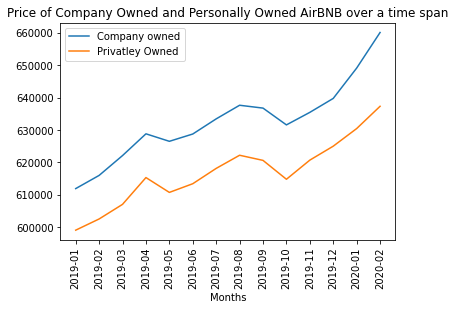

In [39]:

plt.xlabel("Months")
plt.title("Price of Company Owned and Personally Owned AirBNB over a time span")
plt.plot(comowned)
plt.plot(privowned)
plt.xticks(range(0,lengthprices), rotation =90)

plt.legend(["Company owned","Privatley Owned"])
plt.show()